In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import pandas as pd
from google.colab import drive 
import tensorflow
import keras
drive.mount('/content/gdrive')
%matplotlib inline 
test_data = pd.read_csv('gdrive/My Drive/mnist_test.csv', header=None)
train_data = pd.read_csv('gdrive/My Drive/mnist_train.csv', header=None)


Mounted at /content/gdrive


In [ ]:
# Undergrad Students:
# Part1: Introduction: MNIST Database

# Read about the MNIST Db
# Download the CSV here: https://pjreddie.com/projects/mnist-in-csv/
# In a text cell, report on the following:
# What is the database of ?
# What are the inputs (random data, images, audio, etc)?
# What type is the input (floating, integer, byte) ?
# What are the dimensions of the input? 
# How many samples are there in the training set?
# How many samples are there in the testing set?

# Process the Training Database using a NNet
# Read from CSV the inputs and labels (X,Y) in the training data
# Display at least one X sample
# It is advisable to convert the X values into floats
# Make sure that the labels (Y) are one-hot-encoded
# Isolate a validation data set from the training set.

# Mini-Batch SGD training w/sigmoid activation
# Neural network should be a 3 layered NNet with only 1 hidden layer
# Activation should be sigmoid
# Use mini-batch gradient descent to solve for weights and biases
# At the end of each epoc, use the validation data to report on the accuracy of training
# Experiment with batch size, learning rate for the best performance.
# Experiment with initializing of weights using:
# normal PDF
# Xavier

# Train for 100 epocs.
# display error over all epocs,
# display validation accuracy for all epocs,
# display accuracy for testing data set.
# Data Normalization
# Repeat the above by normalizing the entire data set (convert so data mean=0, std=1)
# Repeat by normalizing the batch only (mean=0, std=1)
# Repeat by reducing min to 0 and max=1


# Part 2: Repeat the Training and Testing but with the following modifications:
# Choose the best network in part1 and replace output with softmax.
# Repeat above but with hidden layer tanh activated.
# Repeat above but with hidden layer ReLU activated.
# Repeat RELU but using L2 regularization and 2 hidden layers.

# Graduate Students:
# Part 1: Introduction: notMNIST Database

# Read about the notMNIST Db
# Download the DB here: http://yaroslavvb.blogspot.com/2011/09/notmnist-dataset.html
# I would recommend using the small database.
# The data is a mat files. The page has code on how to read the data and convert to csv
# http://commondatastorage.googleapis.com/books1000/notMNIST_large.tar.gz
# http://commondatastorage.googleapis.com/books1000/notMNIST_small.tar.gz
# Attached is a script to read the data and convert it into a numpy array.
# In a text cell, report on the following:
# What is the database of ?
# What are the inputs (random data, images, audio, etc)?
# What type is the input (floating, integer, byte) ?
# What are the dimensions of the input? 
# How many samples are there in the training set?
# How many samples are there in the testing set?
# How different/similar is the data from the known MNIST? Which do you think would be more difficult to train? 
# Process the Training Database using a NNet
# Report testing accuracy and training loss for the following NNET setup
# Read the data
# The data is in mat files. The page has code on how to read the data and convert to csv
# Split the training DB into training and validation (validation size = testing size).
# 1 hidden layer of 1024 neurons
# sigmoid activations on hidden
# softmax activation on output
# Use Xavier initialization schemes
# Mini-Batch gradient descent (recommended batch size 100-150)
# Normalize each batch (mean=0, std=1)
# Recommended learning rate 0.01-0.03
# Dont go more than 100 epocs (i.e. in each iteration the entire training database is processed)
# Report the accuracy on validation data set in each epoc
# When done training plot error and validation accuracy for each epoc
# Use the testing data to report on the accuracy of the training.
# Part2: For the best network in part 1, repeat the Training and Testing but with the following modifications:
# Use 3 hidden layers.
# Use RELU activations in the hidden layer (instead of sigmoid)
# Add L2 regularization parameter. Recommended regularization ~0.01-0.09
# Add dropout in the hidden layers. Recommended dropout >0.5
# Apply a momentum learner

# 1) Questions
What is the database of? It is MNIST dataset, which has a variety of handwritten digits from 0-9. These are converted into a CSV file for easier processing, treating the image pixels as easily manipulatable values. Inputs are images that are 28x28 pixel grayscale images, where each pixel is treated as one byte integers. There are 60,000 training set samples (images) and 10,000 test set samples. 

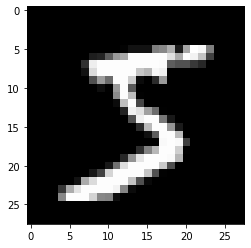

(0.0, 255.0)
       0    1    2    3    4    5    6    7    8    9    ...  775  776  777  \
0        5    0    0    0    0    0    0    0    0    0  ...    0    0    0   
1        0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
2        4    0    0    0    0    0    0    0    0    0  ...    0    0    0   
3        1    0    0    0    0    0    0    0    0    0  ...    0    0    0   
4        9    0    0    0    0    0    0    0    0    0  ...    0    0    0   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
59995    8    0    0    0    0    0    0    0    0    0  ...    0    0    0   
59996    3    0    0    0    0    0    0    0    0    0  ...    0    0    0   
59997    5    0    0    0    0    0    0    0    0    0  ...    0    0    0   
59998    6    0    0    0    0    0    0    0    0    0  ...    0    0    0   
59999    8    0    0    0    0    0    0    0    0    0  ...    0    0    0   

       778  779  780  781  782  783  7

In [ ]:
# Getting the X_train and Y_train values
X_train = train_data.iloc[:, 1:].values.astype('float32')
Y_train = train_data.iloc[:, 0].values

# One-hot encoding the labels (10 classes, digits 0-9)
Y_train = np.eye(10)[Y_train]


# Display one X sample image
plt.imshow(X_train[0].reshape(28, 28), cmap='gray')
plt.show()
print((min(X_train[1]), max(X_train[1])))
print(train_data)
print(Y_train[0]) 


# Getting the X_test and Y_test values
X_test = test_data.iloc[:, 1:].values.astype('float32')
Y_test = test_data.iloc[:, 0].values

# One-hot encoding the labels (10 classes, digits 0-9)
Y_test = np.eye(10)[Y_test]



In [ ]:
# Normalize dataset
def normalize (d):
  dm = np.mean(d, axis=1, keepdims = True)
  dstd = np.std(d, axis = 1, keepdims = True)
  dnan = np.where(dstd == 0)
  dstd[dnan] = 1
  dm[dnan] = 0
  d = d-dm
  d = d/dstd
  return d

X_train = normalize(X_train)
X_test = normalize(X_test)

In [ ]:
def split (d, s = 0.8):
  d_train = d[:int(d.shape[0]*s),:]
  d_val = d[int(d.shape[0]*s):,:]
  return d_train, d_val
X_train, X_val = split(X_train)   # Split training set and validation set
Y_train, Y_val = split(Y_train)
X_test, X_v = split(X_test)
Y_test, Y_v = split(Y_test)


# 2) PART 1: Mini-Batch SGD with Sigmoid Activation - PDF Initialization

In [ ]:
# Initialize weights
width0 = 784
width1 = 200
width2 = 10

# Norm distribution
W0 = np.random.randn(width0,width1)
b0 = np.random.randn(1,width1)
W1 = np.random.randn(width1,width2)
b1 = np.random.randn(1,width2)

#Xavier-like initialization sigmoid
#W0 = W0nn/ np.sqrt(width0+width1)
#W1 = W1nn/ np.sqrt(width1+width2)
#W2 = W2nn/ np.sqrt(width2+width3)
#Xavier initialization sigmoid
#W0 = W0Xu * np.sqrt(6/(width0+width1))
#W1 = W1Xu * np.sqrt(6/(width1+width2))
#W2 = W2Xu * np.sqrt(6/(width2+width3))
#b0 = b0nn * np.sqrt(2)
#b1 = b1nn * np.sqrt(2)
#b2 = b2nn * np.sqrt(2)


In [ ]:
# Testing
itera = 100   # = 100 epochs
b = 1000      # 100 epochs * 1000 sample batches = 6000 batches total 
alpha = 0.05
m = X_train.shape[0]
acc = [0]
p = 0.5
v = 0
E = np.zeros((itera,))
beta = 1
e = 0

for epoc in range(itera):
  

  for i in range(0,m,b):
    
    Z1 = np.dot(X_train[i:i+b,:].reshape(b,X_train.shape[1]), W0)+ b0
    a1 = 1/(1+np.exp(-Z1))
    
    Z2 = np.dot(a1,W1) + b1
    expo = np.exp(Z2-np.max(Z2))
    a2 = expo/np.sum(expo,axis = 1, keepdims = True)
    Yhat = a2
    d = Yhat - Y_train[i:i+b,:]
    g1 = a1*(1-a1)
    g2 = 1
    dEda2 = d*g2
    dEda1 = np.dot(dEda2, W1.T) * g1
    
    dEdW1 = np.dot(a1.T, dEda2)
    dEdb1 = np.sum(dEda2, axis = 0)

    dEdW0 = np.dot(X_train[i:i+b,:].reshape(b,X_train.shape[1]).T, dEda1)
    dEdb0 = np.sum(dEda1, axis = 0, keepdims=True)

    W0 -= W0 + v
    b0 -= alpha/b * dEdb0.reshape(b0.shape)
    W1 -= alpha/b * dEdW1
    b1 -= alpha/b * dEdb1
    
    v = beta*v - alpha/b * dEdb0

    Z1 = np.dot(X_val, W0)+b0
    a1 = 1/(1+np.exp(-Z1))
    Z2 = np.dot(a1,W1) + b1
    expo = np.exp(Z2 - np.max(Z2))
    Yhat = expo/np.sum(expo, axis = 1, keepdims= True)

    E[epoc] = np.sum(0.5*(d**2))
  
    print("\nAccuracy: %d, Error: %d Batch number: %d" %(acc[-1], E[epoc], len(acc)-1))
    acc = np.append(acc, np.sum(np.argmax(Yhat, axis=1) == np.argmax(Y_val, axis = 1))/Y_val.shape[0]*100)
  print("\nEpoch: %d -- Accuracy: %f, Error: %d Batch number: %d" %(epoc +1, acc[-1], E[epoc], len(acc)-1))








<ipython-input-28-1e4de28362cd>:19: RuntimeWarning: overflow encountered in exp
  a1 = 1/(1+np.exp(-Z1))



Accuracy: 0, Error: 853 Batch number: 0

Accuracy: 10, Error: 579 Batch number: 1

Accuracy: 10, Error: 877 Batch number: 2

Accuracy: 9, Error: 902 Batch number: 3

Accuracy: 9, Error: 881 Batch number: 4

Accuracy: 9, Error: 892 Batch number: 5

Accuracy: 9, Error: 887 Batch number: 6

Accuracy: 9, Error: 878 Batch number: 7

Accuracy: 9, Error: 883 Batch number: 8

Accuracy: 9, Error: 896 Batch number: 9

Accuracy: 9, Error: 887 Batch number: 10

Accuracy: 9, Error: 887 Batch number: 11

Accuracy: 9, Error: 886 Batch number: 12

Accuracy: 9, Error: 890 Batch number: 13

Accuracy: 9, Error: 882 Batch number: 14

Accuracy: 9, Error: 876 Batch number: 15

Accuracy: 9, Error: 566 Batch number: 16

Accuracy: 9, Error: 616 Batch number: 17

Accuracy: 9, Error: 593 Batch number: 18

Accuracy: 9, Error: 672 Batch number: 19

Accuracy: 9, Error: 683 Batch number: 20

Accuracy: 9, Error: 623 Batch number: 21

Accuracy: 9, Error: 529 Batch number: 22

Accuracy: 9, Error: 499 Batch number: 23


ValueError: ignored

In [ ]:
# Display error and validation accuracy for all epocs
f1 = plt.figure()
f2 = plt.figure()
ax1 = f1.add_subplot(111)
ax1.plot(range(itera),E)

ax2 = f2.add_subplot(111)    
ax2.plot(range(len(acc)), acc)
plt.show()

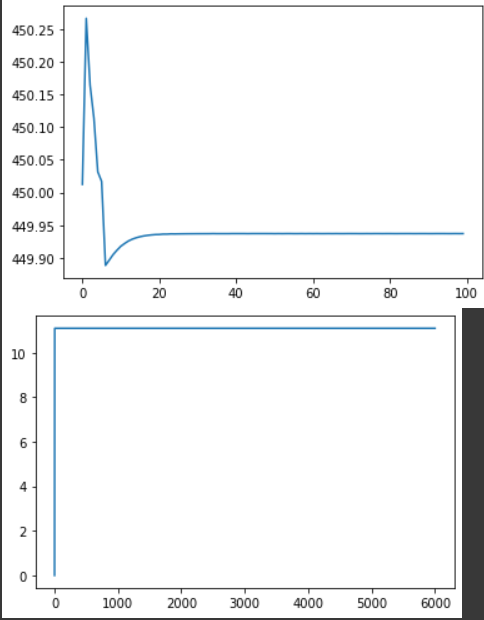

In [ ]:
# validation set
itera = 100   # = 100 epochs
b = 1000      # 100 epochs * 1000 sample batches = 6000 batches total 
alpha = 0.05
m = X_val.shape[0]
acc = [0]
p = 0.5
v = 0
E = np.zeros((itera,))
beta = 1

for epoc in range(itera):
 

  for i in range(0,m,b):
    Z1 = np.dot(X_val[i:i+b,:].reshape(b,X_val.shape[1]), W0)+ b0
    a1 = 1/(1+np.exp(-Z1))
    
    drop = np.random.binomial(1,p,size=a1.shape[1])/p
    a1*= drop
    Z2 = np.dot(a1,W1) + b1
    expo = np.exp(Z2-np.max(Z2))
    a2 = expo/np.sum(expo,axis = 1, keepdims = True)
    Yhat = a2
    d = Yhat - Y_val[i:i+b,:]
    g1 = a1*(1-a1)
    g2 = 1
    dEda2 = d*g2
    dEda1 = np.dot(dEda2, W1.T) * g1
    
    dEdW1 = np.dot(a1.T, dEda2)
    dEdb1 = np.sum(dEda2, axis = 0)

    dEdW0 = np.dot(X_val[i:i+b,:].reshape(b,X_val.shape[1]).T, dEda1)
    dEdb0 = np.sum(dEda1, axis = 0, keepdims=True)

    W0 -= W0 + v
    b0 -= alpha/b * dEdb0.reshape(b0.shape)
    W1 -= alpha/b * dEdW1
    b1 -= alpha/b * dEdb1
    
    v = beta*v - alpha/b * dEdb0

    Z1 = np.dot(X_val, W0)+b0
    a1 = 1/(1+np.exp(-Z1))
    Z2 = np.dot(a1,W1) + b1
    expo = np.exp(Z2 - np.max(Z2))
    Yhat = expo/np.sum(expo, axis = 1, keepdims= True)

    E[epoc] = np.sum(0.5*(d**2))
  

    acc = np.append(acc, np.sum(np.argmax(Yhat, axis=1) == np.argmax(Y_val, axis = 1))/Y_val.shape[0]*100)
  print("\nEpoch: %d, Accuracy: %d, Error: %d Batch number: %d" %(epoc, acc[-1], E[epoc], len(acc)-1))








# 3) PART 1: Training with batch normalization

In [ ]:
# Initialize weights
width0 = 784
width1 = 200
width2 = 10

# Norm distribution
W0 = np.random.randn(width0,width1)
b0 = np.random.randn(1,width1)
W1 = np.random.randn(width1,width2)
b1 = np.random.randn(1,width2)

#Xavier-like initialization sigmoid
#W0 = W0nn/ np.sqrt(width0+width1)
#W1 = W1nn/ np.sqrt(width1+width2)
#W2 = W2nn/ np.sqrt(width2+width3)
#Xavier initialization sigmoid
#W0 = W0Xu * np.sqrt(6/(width0+width1))
#W1 = W1Xu * np.sqrt(6/(width1+width2))
#W2 = W2Xu * np.sqrt(6/(width2+width3))
#b0 = b0nn * np.sqrt(2)
#b1 = b1nn * np.sqrt(2)
#b2 = b2nn * np.sqrt(2)

In [ ]:
# Batch normalization (doesn't work)
X_train = train_data.iloc[:, 1:].values.astype('float32') # reset normalization
itera = 100   # = 100 epochs
b = 1000      # 100 epochs * 1000 sample batches = 6000 batches total 
alpha = 0.05
m = X_train.shape[0]
acc = [0]
p = 0.5
v = 0
E = np.zeros((itera,))
beta = 1

for epoc in range(itera):


  

  for i in range(0,m,b):
    batch = X_train[i:i+b]    # normalize each batch
    normalize(batch)
    Z1 = np.dot(batch[i:i+b,:].reshape(b,batch.shape[1]), W0)+ b0
    a1 = 1/(1+np.exp(-Z1))
    drop = np.random.binomial(1,p,size=a1.shape[1])/p
    

    a1*= drop
    Z2 = np.dot(a1,W1) + b1
    expo = np.exp(Z2-np.max(Z2))
    a2 = expo/np.sum(expo,axis = 1, keepdims = True)
    Yhat = a2
    d = Yhat - Y_train[i:i+b,:]
    g1 = a1*(1-a1)
    g2 = 1
    dEda2 = d*g2
    dEda1 = np.dot(dEda2, W1.T) * g1
    
    dEdW1 = np.dot(a1.T, dEda2)
    dEdb1 = np.sum(dEda2, axis = 0)

    dEdW0 = np.dot(batch[i:i+b,:].reshape(b,batch.shape[1]).T, dEda1)
    dEdb0 = np.sum(dEda1, axis = 0, keepdims=True)

    W0 -= W0 + v
    b0 -= alpha/b * dEdb0.reshape(b0.shape)
    W1 -= alpha/b * dEdW1
    b1 -= alpha/b * dEdb1
    
    v = beta*v - alpha/b * dEdb0

    Z1 = np.dot(X_val, W0)+b0
    a1 = 1/(1+np.exp(-Z1))
    Z2 = np.dot(a1,W1) + b1
    expo = np.exp(Z2 - np.max(Z2))
    Yhat = expo/np.sum(expo, axis = 1, keepdims= True)

    E[epoc] = np.sum(0.5*(d**2))
  

    acc = np.append(acc, np.sum(np.argmax(Yhat, axis=1) == np.argmax(Y_val, axis = 1))/Y_val.shape[0]*100)
  print("\nEpoch: %d, Accuracy: %d, Error: %d Batch number: %d" %(epoc, acc[-1], E[epoc], len(acc)-1))




# 4) PART 2: Softmax Output Sigmoid

In [ ]:
# Softmax Output
# Initialize weights
width0 = 784
width1 = 200
width2 = 10

# Xavier Initialization
b0nn = np.random.randn(1, width1)
b1nn = np.random.randn(1, width2)
W0nn = np.random.randn(width0, width1)
W1nn = np.random.randn(width1, width2)
W0Xu = 2*(np.random.rand(width0, width1)-0.5)
W1Xu = 2*(np.random.rand(width1, width2)-0.5)
W0 = W0Xu * np.sqrt(6/(width0+width1))
W1 = W1Xu * np.sqrt(6/(width1+width2))
b0 = b0nn * np.sqrt(2)
b1 = b1nn * np.sqrt(2)


# Training + validation
itera = 100   # = 100 epochs
b = 1000      # 100 epochs * 1000 sample batches = 4800 batches total 
alpha = 0.05
m = X_train.shape[0]
acc = [0]
E = np.zeros((itera,))
e = 0

for epoc in range(itera):
  

  for i in range(0,m,b):
    
    Z1 = np.dot(X_train[i:i+b,:].reshape(b,X_train.shape[1]), W0)+ b0
    a1 = 1/(1+np.exp(-Z1))      # SIGMOID ACTIVATION
    
    Z2 = np.dot(a1,W1) + b1
    expo = np.exp(Z2-np.max(Z2))
    a2 = expo/np.sum(expo,axis = 1, keepdims = True)
    Yhat = a2
    d = Yhat - Y_train[i:i+b,:]
    g1 = a1*(1-a1)
    g2 = 1
    dEda2 = d*g2
    dEda1 = np.dot(dEda2, W1.T) * g1
    
    dEdW1 = np.dot(a1.T, dEda2)
    dEdb1 = np.sum(dEda2, axis = 0)

    dEdW0 = np.dot(X_train[i:i+b,:].reshape(b,X_train.shape[1]).T, dEda1)
    dEdb0 = np.sum(dEda1, axis = 0, keepdims=True)

    W0 -= alpha/b * dEdW0
    b0 -= alpha/b * dEdb0.reshape(b0.shape)
    W1 -= alpha/b * dEdW1
    b1 -= alpha/b * dEdb1
    
  # Forward Prop
    Z1 = np.dot(X_val, W0)+b0
    a1 = 1/(1+np.exp(-Z1))      # SIGMOID ACTIVATION
    Z2 = np.dot(a1,W1) + b1
    expo = np.exp(Z2 - np.max(Z2))
    Yhat = expo/np.sum(expo, axis = 1, keepdims= True)

    E[epoc] = np.sum(0.5*(d**2))
  
    #print("\nAccuracy: %f, Error: %d Batch number: %d" %(acc[-1], E[epoc], len(acc)-1))
    acc = np.append(acc, np.sum(np.argmax(Yhat, axis=1) == np.argmax(Y_val, axis = 1))/Y_val.shape[0]*100)
  print("\nEpoch: %d -- Accuracy: %2.5f, Error: %d Batch number: %d" %(epoc +1, acc[-1], E[epoc], len(acc)-1))









In [ ]:
f1 = plt.figure()
f2 = plt.figure()
ax1 = f1.add_subplot(111)
ax1.plot(range(itera),E)

ax2 = f2.add_subplot(111)    
ax2.plot(range(len(acc)), acc)
plt.show()


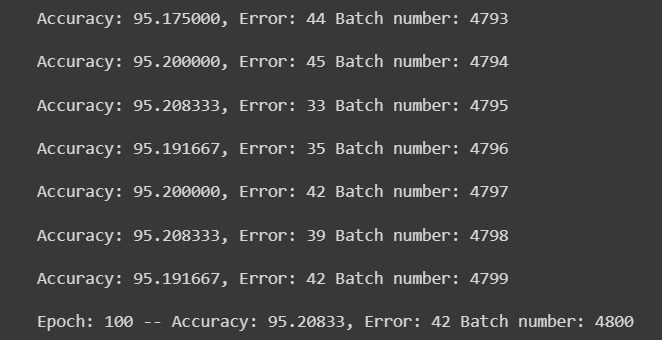

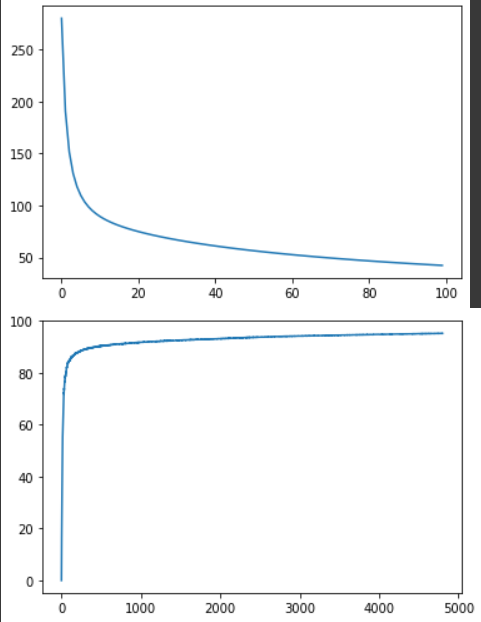

# Lower learning rate (less accurate, more slow learning, less overfitting)
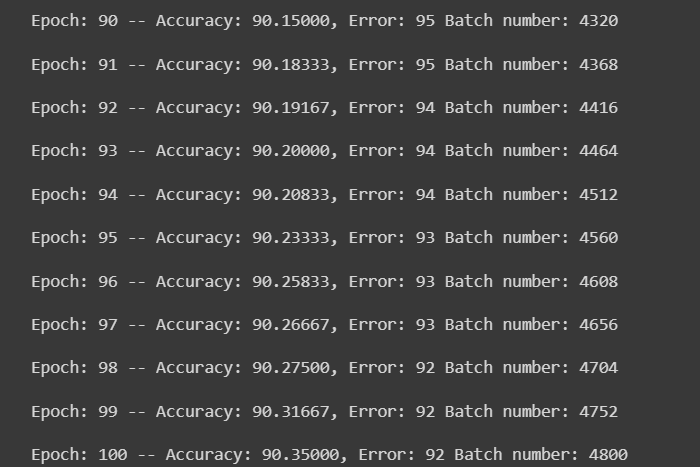

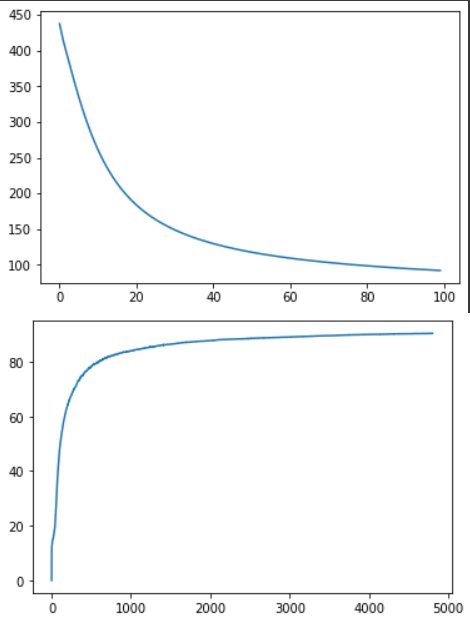

#Softmax test set

In [ ]:
# Softmax Test Set
# Initialize weights
width0 = 784
width1 = 200
width2 = 10

# Xavier Initialization
b0nn = np.random.randn(1, width1)
b1nn = np.random.randn(1, width2)
W0nn = np.random.randn(width0, width1)
W1nn = np.random.randn(width1, width2)
W0Xu = 2*(np.random.rand(width0, width1)-0.5)
W1Xu = 2*(np.random.rand(width1, width2)-0.5)
W0 = W0Xu * np.sqrt(6/(width0+width1))
W1 = W1Xu * np.sqrt(6/(width1+width2))
b0 = b0nn * np.sqrt(2)
b1 = b1nn * np.sqrt(2)


# Testing
itera = 100   # = 100 epochs
b = 1000      # 100 epochs * 1000 sample batches = 4800 batches total 
alpha = 0.05
m = X_test.shape[0]
acc = [0]
E = np.zeros((itera,))
e = 0

for epoc in range(itera):
  

  for i in range(0,m,b):
    
    Z1 = np.dot(X_test[i:i+b,:].reshape(b,X_test.shape[1]), W0)+ b0
    a1 = 1/(1+np.exp(-Z1))      # SIGMOID ACTIVATION
    
    Z2 = np.dot(a1,W1) + b1
    expo = np.exp(Z2-np.max(Z2))
    a2 = expo/np.sum(expo,axis = 1, keepdims = True)
    Yhat = a2
    d = Yhat - Y_test[i:i+b,:]
    g1 = a1*(1-a1)
    g2 = 1
    dEda2 = d*g2
    dEda1 = np.dot(dEda2, W1.T) * g1
    
    dEdW1 = np.dot(a1.T, dEda2)
    dEdb1 = np.sum(dEda2, axis = 0)

    dEdW0 = np.dot(X_test[i:i+b,:].reshape(b,X_test.shape[1]).T, dEda1)
    dEdb0 = np.sum(dEda1, axis = 0, keepdims=True)

    W0 -= alpha/b * dEdW0
    b0 -= alpha/b * dEdb0.reshape(b0.shape)
    W1 -= alpha/b * dEdW1
    b1 -= alpha/b * dEdb1
    
  # Forward Prop
    Z1 = np.dot(X_v, W0)+b0
    a1 = 1/(1+np.exp(-Z1))      # SIGMOID ACTIVATION
    Z2 = np.dot(a1,W1) + b1
    expo = np.exp(Z2 - np.max(Z2))
    Yhat = expo/np.sum(expo, axis = 1, keepdims= True)

    E[epoc] = np.sum(0.5*(d**2))
  
    #print("\nAccuracy: %f, Error: %d Batch number: %d" %(acc[-1], E[epoc], len(acc)-1))
    acc = np.append(acc, np.sum(np.argmax(Yhat, axis=1) == np.argmax(Y_v, axis = 1))/Y_v.shape[0]*100)
  print("\nEpoch: %d -- Accuracy: %2.5f, Error: %d Batch number: %d" %(epoc +1, acc[-1], E[epoc], len(acc)-1))










Epoch: 1 -- Accuracy: 46.50000, Error: 418 Batch number: 8

Epoch: 2 -- Accuracy: 64.40000, Error: 381 Batch number: 16

Epoch: 3 -- Accuracy: 72.35000, Error: 347 Batch number: 24

Epoch: 4 -- Accuracy: 76.85000, Error: 316 Batch number: 32

Epoch: 5 -- Accuracy: 79.40000, Error: 287 Batch number: 40

Epoch: 6 -- Accuracy: 81.65000, Error: 262 Batch number: 48

Epoch: 7 -- Accuracy: 83.25000, Error: 241 Batch number: 56

Epoch: 8 -- Accuracy: 84.35000, Error: 222 Batch number: 64

Epoch: 9 -- Accuracy: 85.15000, Error: 206 Batch number: 72

Epoch: 10 -- Accuracy: 85.50000, Error: 192 Batch number: 80

Epoch: 11 -- Accuracy: 86.15000, Error: 181 Batch number: 88

Epoch: 12 -- Accuracy: 86.50000, Error: 170 Batch number: 96

Epoch: 13 -- Accuracy: 87.15000, Error: 161 Batch number: 104

Epoch: 14 -- Accuracy: 87.55000, Error: 153 Batch number: 112

Epoch: 15 -- Accuracy: 87.85000, Error: 146 Batch number: 120

Epoch: 16 -- Accuracy: 88.10000, Error: 140 Batch number: 128

Epoch: 17 -- 

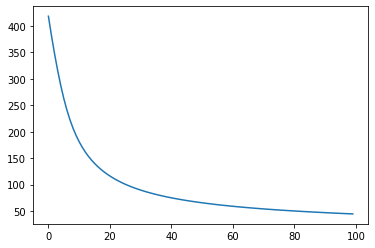

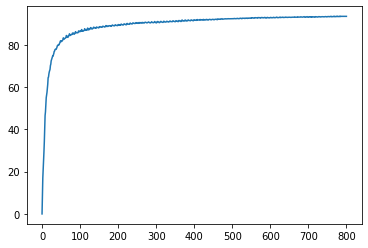

In [ ]:
# Testing
f1 = plt.figure()
f2 = plt.figure()
ax1 = f1.add_subplot(111)
ax1.plot(range(itera),E)

ax2 = f2.add_subplot(111)    
ax2.plot(range(len(acc)), acc)
plt.show()


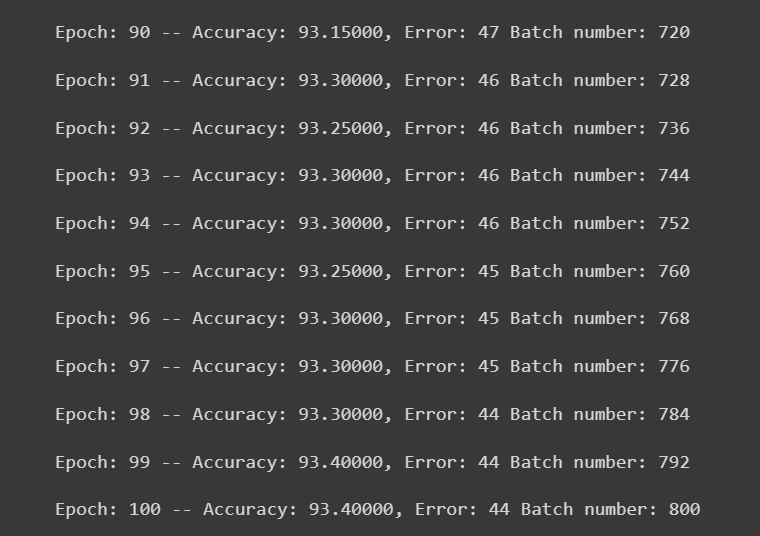
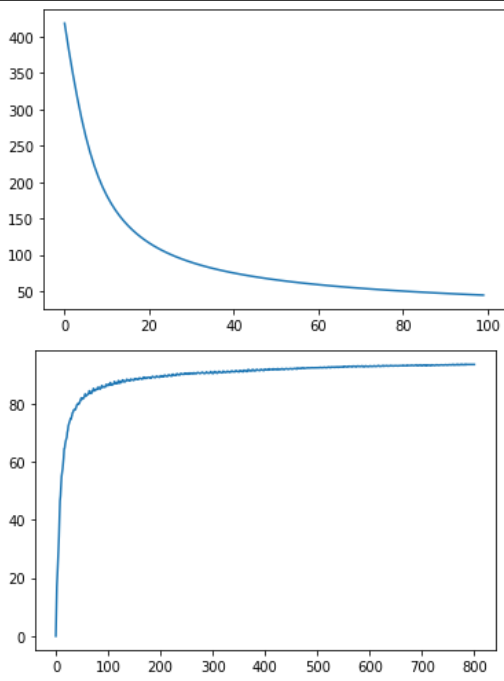

# 5) PART 2: Tanh Activation

In [ ]:
# Softmax Output
# Initialize weights
width0 = 784
width1 = 200
width2 = 10

# Xavier Initialization
b0nn = np.random.randn(1, width1)
b1nn = np.random.randn(1, width2)
W0nn = np.random.randn(width0, width1)
W1nn = np.random.randn(width1, width2)
W0Xu = 2*(np.random.rand(width0, width1)-0.5)
W1Xu = 2*(np.random.rand(width1, width2)-0.5)
W0 = W0Xu * np.sqrt(6/(width0+width1))
W1 = W1Xu * np.sqrt(6/(width1+width2))
b0 = b0nn * np.sqrt(2)
b1 = b1nn * np.sqrt(2)

# Training + validation
itera = 100   # = 100 epochs
b = 1000      # 100 epochs * 1000 sample batches = 4800 batches total 
alpha = 0.005
m = X_train.shape[0]
acc = [0]
E = np.zeros((itera,))
e = 0

for epoc in range(itera):
  

  for i in range(0,m,b):
    
    Z1 = np.dot(X_train[i:i+b,:].reshape(b,X_train.shape[1]), W0)+ b0
    a1 = np.tanh(Z1)       # TANH ACTIVATION
    
    Z2 = np.dot(a1,W1) + b1
    expo = np.exp(Z2-np.max(Z2))
    a2 = expo/np.sum(expo,axis = 1, keepdims = True)
    Yhat = a2
    d = Yhat - Y_train[i:i+b,:]
    g1 = 1 - a1**2
    g2 = 1
    dEda2 = d*g2
    dEda1 = np.dot(dEda2, W1.T) * g1
    
    dEdW1 = np.dot(a1.T, dEda2)
    dEdb1 = np.sum(dEda2, axis = 0)

    dEdW0 = np.dot(X_train[i:i+b,:].reshape(b,X_train.shape[1]).T, dEda1)
    dEdb0 = np.sum(dEda1, axis = 0, keepdims=True)

    W0 -= alpha/b * dEdW0
    b0 -= alpha/b * dEdb0.reshape(b0.shape)
    W1 -= alpha/b * dEdW1
    b1 -= alpha/b * dEdb1
    
  # Forward Prop
    Z1 = np.dot(X_val, W0)+b0
    a1 = np.tanh(Z1)          # TANH ACTIVATION
    Z2 = np.dot(a1,W1) + b1
    expo = np.exp(Z2 - np.max(Z2))
    Yhat = expo/np.sum(expo, axis = 1, keepdims= True)

    E[epoc] = np.sum(0.5*(d**2))
  
    #print("\nAccuracy: %f, Error: %d Batch number: %d" %(acc[-1], E[epoc], len(acc)-1))
    acc = np.append(acc, np.sum(np.argmax(Yhat, axis=1) == np.argmax(Y_val, axis = 1))/Y_val.shape[0]*100)
  print("\nEpoch: %d -- Accuracy: %2.5f, Error: %d Batch number: %d" %(epoc +1, acc[-1], E[epoc], len(acc)-1))









In [ ]:
# Display error and validation accuracy for all epocs
f1 = plt.figure()
f2 = plt.figure()
ax1 = f1.add_subplot(111)
ax1.plot(range(itera),E)

ax2 = f2.add_subplot(111)    
ax2.plot(range(len(acc)), acc)
plt.show()

# Accuracy = 97%, MSE = ~10 to ~20

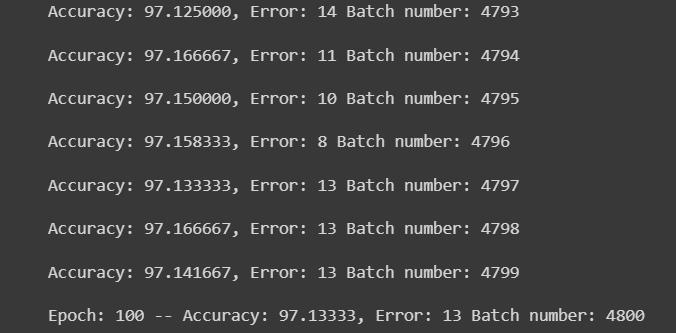

# Tanh Activation MSE and Accuracy vs Epochs
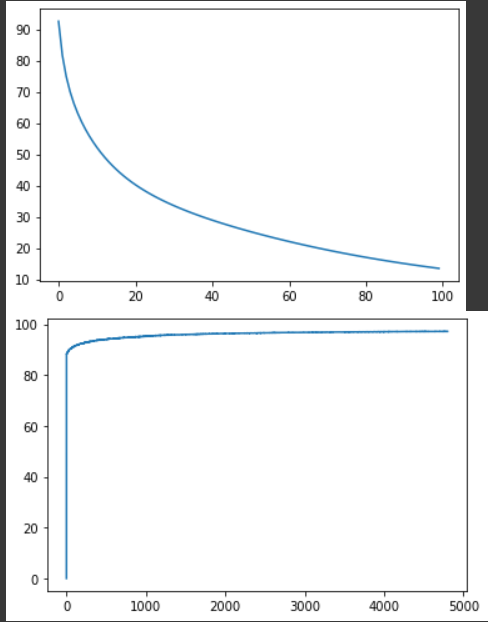

# Tanh test set

In [ ]:
# Tanh Test
# Initialize weights
width0 = 784
width1 = 200
width2 = 10

# Xavier Initialization
b0nn = np.random.randn(1, width1)
b1nn = np.random.randn(1, width2)
W0nn = np.random.randn(width0, width1)
W1nn = np.random.randn(width1, width2)
W0Xu = 2*(np.random.rand(width0, width1)-0.5)
W1Xu = 2*(np.random.rand(width1, width2)-0.5)
W0 = W0Xu * np.sqrt(6/(width0+width1))
W1 = W1Xu * np.sqrt(6/(width1+width2))
b0 = b0nn * np.sqrt(2)
b1 = b1nn * np.sqrt(2)

# Training + validation
itera = 100   # = 100 epochs
b = 1000      # 100 epochs * 1000 sample batches = 4800 batches total 
alpha = 0.005
m = X_test.shape[0]
acc = [0]
E = np.zeros((itera,))
e = 0

for epoc in range(itera):
  

  for i in range(0,m,b):
    
    Z1 = np.dot(X_test[i:i+b,:].reshape(b,X_test.shape[1]), W0)+ b0
    a1 = np.tanh(Z1)       # TANH ACTIVATION
    
    Z2 = np.dot(a1,W1) + b1
    expo = np.exp(Z2-np.max(Z2))
    a2 = expo/np.sum(expo,axis = 1, keepdims = True)
    Yhat = a2
    d = Yhat - Y_test[i:i+b,:]
    g1 = 1 - a1**2
    g2 = 1
    dEda2 = d*g2
    dEda1 = np.dot(dEda2, W1.T) * g1
    
    dEdW1 = np.dot(a1.T, dEda2)
    dEdb1 = np.sum(dEda2, axis = 0)

    dEdW0 = np.dot(X_test[i:i+b,:].reshape(b,X_test.shape[1]).T, dEda1)
    dEdb0 = np.sum(dEda1, axis = 0, keepdims=True)

    W0 -= alpha/b * dEdW0
    b0 -= alpha/b * dEdb0.reshape(b0.shape)
    W1 -= alpha/b * dEdW1
    b1 -= alpha/b * dEdb1
    
  # Forward Prop
    Z1 = np.dot(X_v, W0)+b0
    a1 = np.tanh(Z1)          # TANH ACTIVATION
    Z2 = np.dot(a1,W1) + b1
    expo = np.exp(Z2 - np.max(Z2))
    Yhat = expo/np.sum(expo, axis = 1, keepdims= True)

    E[epoc] = np.sum(0.5*(d**2))
  
    #print("\nAccuracy: %f, Error: %d Batch number: %d" %(acc[-1], E[epoc], len(acc)-1))
    acc = np.append(acc, np.sum(np.argmax(Yhat, axis=1) == np.argmax(Y_v, axis = 1))/Y_v.shape[0]*100)
  print("\nEpoch: %d -- Accuracy: %2.5f, Error: %d Batch number: %d" %(epoc +1, acc[-1], E[epoc], len(acc)-1))










Epoch: 1 -- Accuracy: 19.75000, Error: 461 Batch number: 8

Epoch: 2 -- Accuracy: 32.75000, Error: 415 Batch number: 16

Epoch: 3 -- Accuracy: 40.80000, Error: 383 Batch number: 24

Epoch: 4 -- Accuracy: 48.95000, Error: 355 Batch number: 32

Epoch: 5 -- Accuracy: 57.95000, Error: 330 Batch number: 40

Epoch: 6 -- Accuracy: 64.65000, Error: 308 Batch number: 48

Epoch: 7 -- Accuracy: 68.05000, Error: 289 Batch number: 56

Epoch: 8 -- Accuracy: 70.95000, Error: 272 Batch number: 64

Epoch: 9 -- Accuracy: 73.40000, Error: 258 Batch number: 72

Epoch: 10 -- Accuracy: 74.85000, Error: 244 Batch number: 80

Epoch: 11 -- Accuracy: 76.05000, Error: 233 Batch number: 88

Epoch: 12 -- Accuracy: 77.00000, Error: 222 Batch number: 96

Epoch: 13 -- Accuracy: 78.35000, Error: 212 Batch number: 104

Epoch: 14 -- Accuracy: 78.85000, Error: 204 Batch number: 112

Epoch: 15 -- Accuracy: 79.95000, Error: 196 Batch number: 120

Epoch: 16 -- Accuracy: 80.70000, Error: 189 Batch number: 128

Epoch: 17 -- 

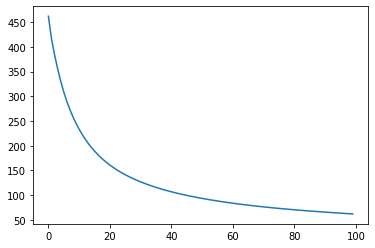

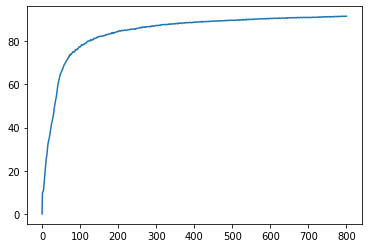

In [ ]:
# Testing
f1 = plt.figure()
f2 = plt.figure()
ax1 = f1.add_subplot(111)
ax1.plot(range(itera),E)

ax2 = f2.add_subplot(111)    
ax2.plot(range(len(acc)), acc)
plt.show()


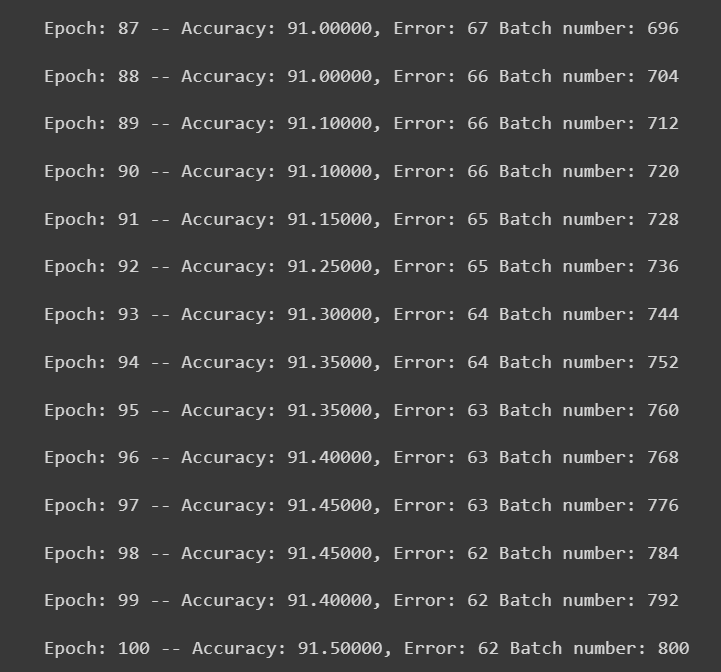

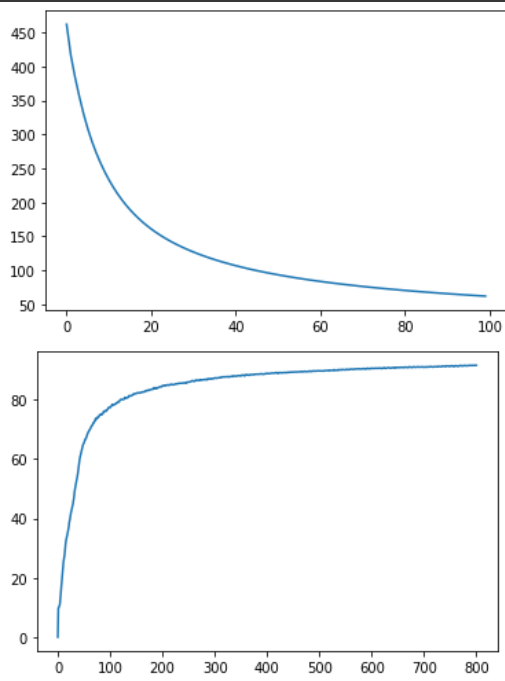

# 6) PART 2: Relu Activation

In [ ]:
# Softmax Output
# Initialize weights
width0 = 784
width1 = 200
width2 = 10

# He initialization
W0Xu = 2*(np.random.rand(width0, width1)-0.5)
W1Xu = 2*(np.random.rand(width1, width2)-0.5)
W0 = W0Xu*np.sqrt(6/width0)
W1 = W1Xu*np.sqrt(6/width1)
b0 = np.random.randn(1, width1)
b1 = np.random.randn(1, width2)


# Train
itera = 100   # = 100 epochs
b = 1000      # 100 epochs * 1000 sample batches = 4800 batches total 
alpha = 0.05
m = X_train.shape[0]
acc = [0]
E = np.zeros((itera,))
e = 0

for epoc in range(itera):
  

  for i in range(0,m,b):
    
    Xn = X_train[i:i+b,:].reshape(b,X_train.shape[1])
    Xn = (Xn - np.mean(Xn))/np.std(Xn)
    Z1 = np.dot(Xn,W0)+b0
    a1 = np.maximum(0, Z1)
    
    Z2 = np.dot(a1,W1) + b1
    expo = np.exp(Z2-np.max(Z2))
    a2 = np.maximum(0,Z2) 
    Yhat = a2
    d = Yhat - Y_train[i:i+b,:]
    g1 = np.where(Z1 > 0, 1, 0)
    g2 = 1
    dEda2 = d*g2
    dEda1 = np.dot(dEda2, W1.T) * g1
    
    dEdW1 = np.dot(a1.T, dEda2)
    dEdb1 = np.sum(dEda2, axis = 0)

    dEdW0 = np.dot(X_train[i:i+b,:].reshape(b,X_train.shape[1]).T, dEda1)
    dEdb0 = np.sum(dEda1, axis = 0, keepdims=True)

    W0 -= alpha/b * dEdW0
    b0 -= alpha/b * dEdb0.reshape(b0.shape)
    W1 -= alpha/b * dEdW1
    b1 -= alpha/b * dEdb1

  # Forward Prop
    Z1 = np.dot(X_val, W0)+b0
    a1 = np.maximum(0, Z1)
    Z2 = np.dot(a1,W1) + b1
    expo = np.exp(Z2 - np.max(Z2))
    Yhat = expo/np.sum(expo, axis = 1, keepdims= True)

    E[epoc] = np.sum(0.5*(d**2))
  
    #print("\nAccuracy: %f, Error: %d Batch number: %d" %(acc[-1], E[epoc], len(acc)-1))
    acc = np.append(acc, np.sum(np.argmax(Yhat, axis=1) == np.argmax(Y_val, axis = 1))/Y_val.shape[0]*100)
  print("\nEpoch: %d -- Accuracy: %2.5f, Error: %d Batch number: %d" %(epoc +1, acc[-1], E[epoc], len(acc)-1))









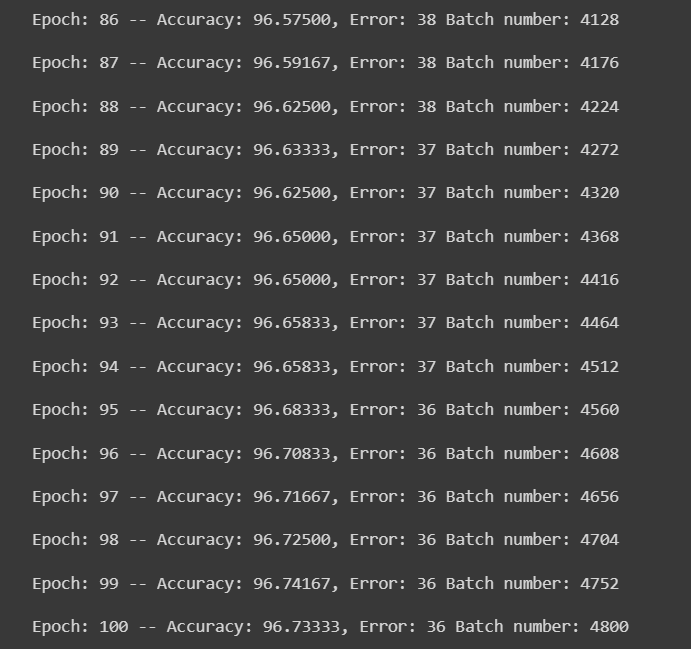

In [ ]:
# Display error and validation accuracy for all epocs
f1 = plt.figure()
f2 = plt.figure()
ax1 = f1.add_subplot(111)
ax1.plot(range(itera),E)

ax2 = f2.add_subplot(111)    
ax2.plot(range(len(acc)), acc)
plt.show()

# Accuracy = ~96.7%, MSE = ~30 to ~40

# ReLU Activation MSE and Accuracy vs Epochs
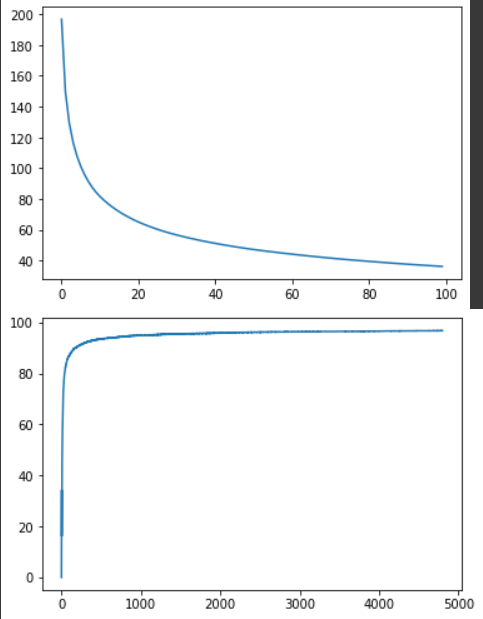

#ReLU test set

In [ ]:
#ReLU Test
# Initialize weights
width0 = 784
width1 = 200
width2 = 10

# He initialization
W0Xu = 2*(np.random.rand(width0, width1)-0.5)
W1Xu = 2*(np.random.rand(width1, width2)-0.5)
W0 = W0Xu*np.sqrt(6/width0)
W1 = W1Xu*np.sqrt(6/width1)
b0 = np.random.randn(1, width1)
b1 = np.random.randn(1, width2)


# Test
itera = 100   # = 100 epochs
b = 1000      # 100 epochs * 1000 sample batches = 4800 batches total 
alpha = 0.05
m = X_test.shape[0]
acc = [0]
E = np.zeros((itera,))
e = 0

for epoc in range(itera):
  

  for i in range(0,m,b):
    
    Xn = X_test[i:i+b,:].reshape(b,X_test.shape[1])
    Xn = (Xn - np.mean(Xn))/np.std(Xn)
    Z1 = np.dot(Xn,W0)+b0
    a1 = np.maximum(0, Z1)
    
    Z2 = np.dot(a1,W1) + b1
    expo = np.exp(Z2-np.max(Z2))
    a2 = np.maximum(0,Z2) 
    Yhat = a2
    d = Yhat - Y_test[i:i+b,:]
    g1 = np.where(Z1 > 0, 1, 0)
    g2 = 1
    dEda2 = d*g2
    dEda1 = np.dot(dEda2, W1.T) * g1
    
    dEdW1 = np.dot(a1.T, dEda2)
    dEdb1 = np.sum(dEda2, axis = 0)

    dEdW0 = np.dot(X_test[i:i+b,:].reshape(b,X_test.shape[1]).T, dEda1)
    dEdb0 = np.sum(dEda1, axis = 0, keepdims=True)

    W0 -= alpha/b * dEdW0
    b0 -= alpha/b * dEdb0.reshape(b0.shape)
    W1 -= alpha/b * dEdW1
    b1 -= alpha/b * dEdb1

  # Forward Prop
    Z1 = np.dot(X_v, W0)+b0
    a1 = np.maximum(0, Z1)
    Z2 = np.dot(a1,W1) + b1
    expo = np.exp(Z2 - np.max(Z2))
    Yhat = expo/np.sum(expo, axis = 1, keepdims= True)

    E[epoc] = np.sum(0.5*(d**2))
  
    #print("\nAccuracy: %f, Error: %d Batch number: %d" %(acc[-1], E[epoc], len(acc)-1))
    acc = np.append(acc, np.sum(np.argmax(Yhat, axis=1) == np.argmax(Y_v, axis = 1))/Y_v.shape[0]*100)
  print("\nEpoch: %d -- Accuracy: %2.5f, Error: %d Batch number: %d" %(epoc +1, acc[-1], E[epoc], len(acc)-1))










Epoch: 1 -- Accuracy: 32.45000, Error: 430 Batch number: 8

Epoch: 2 -- Accuracy: 48.05000, Error: 368 Batch number: 16

Epoch: 3 -- Accuracy: 64.70000, Error: 287 Batch number: 24

Epoch: 4 -- Accuracy: 70.05000, Error: 246 Batch number: 32

Epoch: 5 -- Accuracy: 79.00000, Error: 201 Batch number: 40

Epoch: 6 -- Accuracy: 81.05000, Error: 175 Batch number: 48

Epoch: 7 -- Accuracy: 82.35000, Error: 159 Batch number: 56

Epoch: 8 -- Accuracy: 83.35000, Error: 147 Batch number: 64

Epoch: 9 -- Accuracy: 84.30000, Error: 137 Batch number: 72

Epoch: 10 -- Accuracy: 85.00000, Error: 130 Batch number: 80

Epoch: 11 -- Accuracy: 85.90000, Error: 123 Batch number: 88

Epoch: 12 -- Accuracy: 86.95000, Error: 118 Batch number: 96

Epoch: 13 -- Accuracy: 87.45000, Error: 114 Batch number: 104

Epoch: 14 -- Accuracy: 87.60000, Error: 110 Batch number: 112

Epoch: 15 -- Accuracy: 87.65000, Error: 106 Batch number: 120

Epoch: 16 -- Accuracy: 88.10000, Error: 103 Batch number: 128

Epoch: 17 -- 

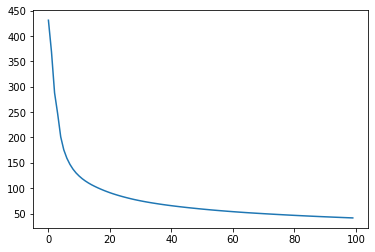

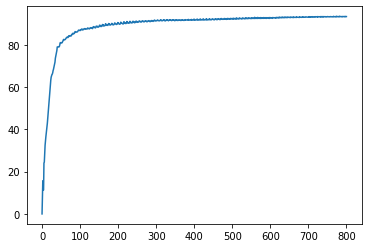

In [ ]:
# Display error and validation accuracy for all epocs
f1 = plt.figure()
f2 = plt.figure()
ax1 = f1.add_subplot(111)
ax1.plot(range(itera),E)

ax2 = f2.add_subplot(111)    
ax2.plot(range(len(acc)), acc)
plt.show()

# Accuracy = ~93.5%, MSE = ~40

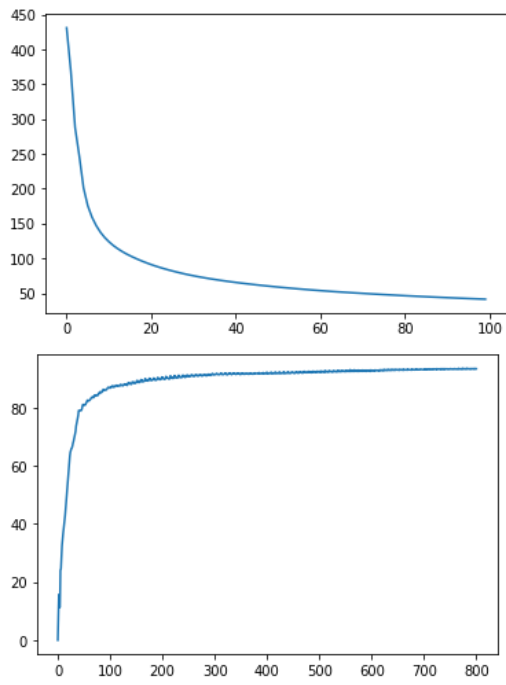
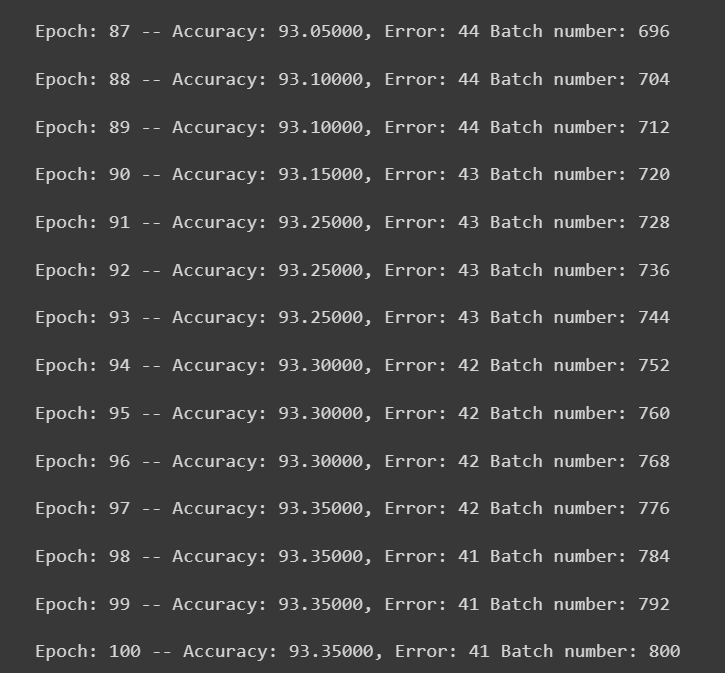

# 7) L2 Regularization & 2 Hidden Layers

In [ ]:

width0 = 784
width1 = 200
width2 = 200
width3 = 10

# He initialization
W0Xu = 2*(np.random.rand(width0, width1)-0.5)
W1Xu = 2*(np.random.rand(width1, width2)-0.5)
W2Xu = 2*(np.random.rand(width2, width3)-0.5)
W0 = W0Xu*np.sqrt(6/width0)
W1 = W1Xu*np.sqrt(6/width1)
W2 = W2Xu*np.sqrt(6/width2)
b0 = np.random.randn(1, width1)
b1 = np.random.randn(1, width2)
b2 = np.random.randn(1, width3)

itera = 100
alpha = .05
b = 1000 #batch size. b=1 fuor SGD, b<m for miniBGD, b=m for BGD
m = X_train.shape[0] #nmber of samples
E = np.zeros((itera,))
acc= [0] #accuracy vector after each iteration
L2 = 0.01   # L2 Regularization constant lambda

for epoc in range(itera):
  

  for i in range(0,m,b):
    Xn = X_train[i:i+b,:].reshape(b,X_train.shape[1])
    Xn = (Xn - np.mean(Xn))/np.std(Xn)
    Z1 = np.dot(Xn,W0)+b0 #1st layer (output)
    a1 = np.maximum(0,Z1) #relu activation of hidden layer 1
    Z2 = np.dot(a1,W1)+b1
    a2 = np.maximum(0,Z2) #relu activation of hidden layer 2
    Z3 = np.dot(a2,W2)+b2
    expo = np.exp(Z3-np.max(Z3)) #softmax numerator. subtract stabilize.
    a3 = expo/np.sum(expo,axis=1, keepdims=True) #softmax

    Yhat = a3 #nnet output
    d = Yhat - Y_train[i:i+b,:] #delta

    g1 = (a1>0)*1 #relu derivative of layer 1
    g2 = (a2>0)*1
    g3 = 1 #softmax

    dEda3 = d * g3
    dEda2 = np.dot(dEda3 , W2.T) * g2
    dEda1 = np.dot(dEda2 , W1.T) * g1

    dEdW2 = np.dot(a2.T, dEda3) + L2 * W2
    dEdb2 = np.sum(dEda3, axis=0, keepdims=True)

    dEdW1 = np.dot(a1.T,dEda2)  + L2 * W1
    dEdb1 = np.sum(dEda2, axis=0, keepdims=True)

    dEdW0 = np.dot(X_train[i:i+b,:].reshape(b,X_train.shape[1]).T, dEda1) + L2 * W0
    dEdb0 = np.sum(dEda1, axis=0, keepdims=True)

    W0 -= alpha/m * dEdW0
    b0 -= alpha/m * dEdb0
    W1 -= alpha/m * dEdW1
    b1 -= alpha/m * dEdb1
    W2 -= alpha/m * dEdW2
    b2 -= alpha/m * dEdb2

    #forward propagate to capture error and accuracy:
    Z1 = np.dot(X_val,W0)+b0 #1st layer (output)
    a1 = np.maximum(0,Z1)
    Z2 = np.dot(a1,W1)+b1
    a2 = np.maximum(0,Z2)
    Z3 = np.dot(a2,W2)+b2
    expo = np.exp(Z3-np.max(Z3)) #softmax to numerator. subtract stabilize.
    Yhat = expo/np.sum(expo,axis=1, keepdims=True)

    E[epoc] = np.sum(0.5*(d**2))
    #print("\nAccuracy: %f, Error: %d Batch number: %d" %(acc[-1], E[epoc], len(acc)-1))
    acc = np.append(acc, np.sum(np.argmax(Yhat, axis=1) == np.argmax(Y_val, axis = 1))/Y_val.shape[0]*100)
  print("\nEpoch: %d -- Accuracy: %2.5f, Error: %d Batch number: %d" %(epoc +1, acc[-1], E[epoc], len(acc)-1))

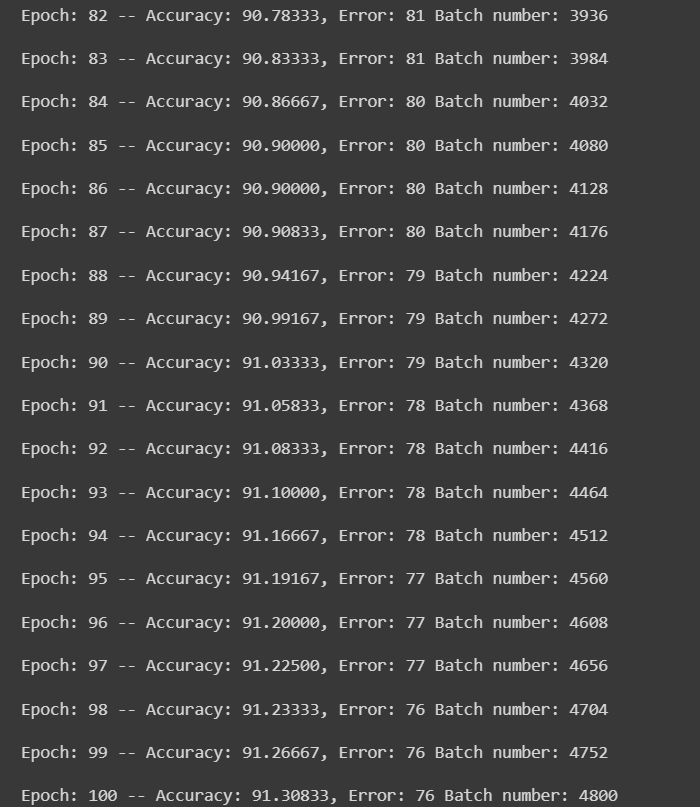

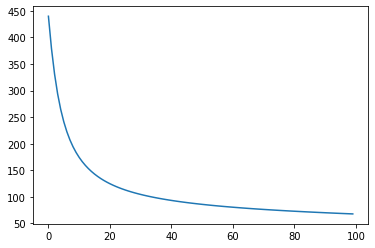

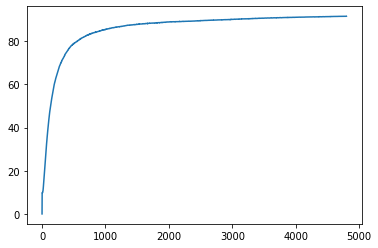

In [ ]:
# Display error and validation accuracy for all epocs
f1 = plt.figure()
f2 = plt.figure()
ax1 = f1.add_subplot(111)
ax1.plot(range(itera),E)

ax2 = f2.add_subplot(111)    
ax2.plot(range(len(acc)), acc)
plt.show()

# Accuracy = ~91.5%, MSE = ~75

# L2 Regularization MSE & Accuracy vs Epochs
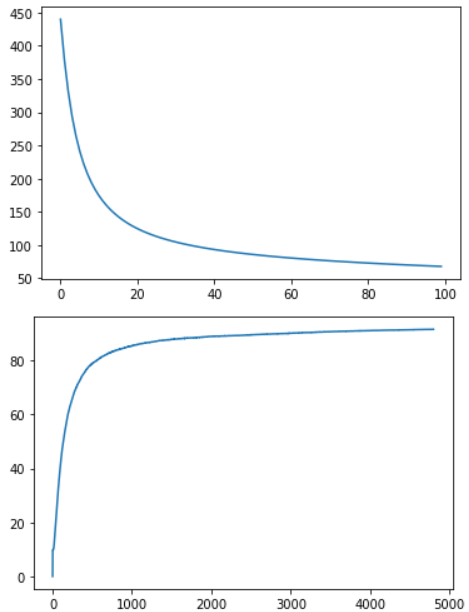

#L2 test set


In [ ]:
# Test L2
width0 = 784
width1 = 200
width2 = 200
width3 = 10

# He initialization
W0Xu = 2*(np.random.rand(width0, width1)-0.5)
W1Xu = 2*(np.random.rand(width1, width2)-0.5)
W2Xu = 2*(np.random.rand(width2, width3)-0.5)
W0 = W0Xu*np.sqrt(6/width0)
W1 = W1Xu*np.sqrt(6/width1)
W2 = W2Xu*np.sqrt(6/width2)
b0 = np.random.randn(1, width1)
b1 = np.random.randn(1, width2)
b2 = np.random.randn(1, width3)

itera = 100
alpha = .05
b = 1000 #batch size. b=1 fuor SGD, b<m for miniBGD, b=m for BGD
m = X_test.shape[0] #nmber of samples
E = np.zeros((itera,))
acc= [0] #accuracy vector after each iteration
L2 = 0.01   # L2 Regularization constant lambda

for epoc in range(itera):
  

  for i in range(0,m,b):
    Xn = X_test[i:i+b,:].reshape(b,X_test.shape[1])
    Xn = (Xn - np.mean(Xn))/np.std(Xn)
    Z1 = np.dot(Xn,W0)+b0 #1st layer (output)
    a1 = np.maximum(0,Z1) #relu activation of hidden layer 1
    Z2 = np.dot(a1,W1)+b1
    a2 = np.maximum(0,Z2) #relu activation of hidden layer 2
    Z3 = np.dot(a2,W2)+b2
    expo = np.exp(Z3-np.max(Z3)) #softmax numerator. subtract stabilize.
    a3 = expo/np.sum(expo,axis=1, keepdims=True) #softmax

    Yhat = a3 #nnet output
    d = Yhat - Y_test[i:i+b,:] #delta

    g1 = (a1>0)*1 #relu derivative of layer 1
    g2 = (a2>0)*1
    g3 = 1 #softmax

    dEda3 = d * g3
    dEda2 = np.dot(dEda3 , W2.T) * g2
    dEda1 = np.dot(dEda2 , W1.T) * g1

    dEdW2 = np.dot(a2.T, dEda3) + L2 * W2
    dEdb2 = np.sum(dEda3, axis=0, keepdims=True)

    dEdW1 = np.dot(a1.T,dEda2)  + L2 * W1
    dEdb1 = np.sum(dEda2, axis=0, keepdims=True)

    dEdW0 = np.dot(X_test[i:i+b,:].reshape(b,X_test.shape[1]).T, dEda1) + L2 * W0
    dEdb0 = np.sum(dEda1, axis=0, keepdims=True)

    W0 -= alpha/m * dEdW0
    b0 -= alpha/m * dEdb0
    W1 -= alpha/m * dEdW1
    b1 -= alpha/m * dEdb1
    W2 -= alpha/m * dEdW2
    b2 -= alpha/m * dEdb2

    #forward propagate to capture error and accuracy:
    Z1 = np.dot(X_v,W0)+b0 #1st layer (output)
    a1 = np.maximum(0,Z1)
    Z2 = np.dot(a1,W1)+b1
    a2 = np.maximum(0,Z2)
    Z3 = np.dot(a2,W2)+b2
    expo = np.exp(Z3-np.max(Z3)) #softmax to numerator. subtract stabilize.
    Yhat = expo/np.sum(expo,axis=1, keepdims=True)

    E[epoc] = np.sum(0.5*(d**2))
    #print("\nAccuracy: %f, Error: %d Batch number: %d" %(acc[-1], E[epoc], len(acc)-1))
    acc = np.append(acc, np.sum(np.argmax(Yhat, axis=1) == np.argmax(Y_v, axis = 1))/Y_v.shape[0]*100)
  print("\nEpoch: %d -- Accuracy: %2.5f, Error: %d Batch number: %d" %(epoc +1, acc[-1], E[epoc], len(acc)-1))


Epoch: 1 -- Accuracy: 25.10000, Error: 440 Batch number: 8

Epoch: 2 -- Accuracy: 41.65000, Error: 382 Batch number: 16

Epoch: 3 -- Accuracy: 53.30000, Error: 334 Batch number: 24

Epoch: 4 -- Accuracy: 62.25000, Error: 293 Batch number: 32

Epoch: 5 -- Accuracy: 68.60000, Error: 260 Batch number: 40

Epoch: 6 -- Accuracy: 71.90000, Error: 232 Batch number: 48

Epoch: 7 -- Accuracy: 75.55000, Error: 209 Batch number: 56

Epoch: 8 -- Accuracy: 77.65000, Error: 191 Batch number: 64

Epoch: 9 -- Accuracy: 79.75000, Error: 175 Batch number: 72

Epoch: 10 -- Accuracy: 81.55000, Error: 163 Batch number: 80

Epoch: 11 -- Accuracy: 82.80000, Error: 152 Batch number: 88

Epoch: 12 -- Accuracy: 84.15000, Error: 143 Batch number: 96

Epoch: 13 -- Accuracy: 84.80000, Error: 135 Batch number: 104

Epoch: 14 -- Accuracy: 85.40000, Error: 128 Batch number: 112

Epoch: 15 -- Accuracy: 85.90000, Error: 122 Batch number: 120

Epoch: 16 -- Accuracy: 86.40000, Error: 116 Batch number: 128

Epoch: 17 -- 

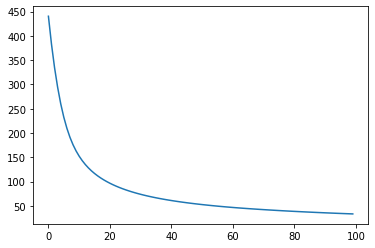

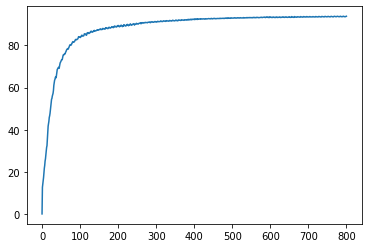

In [ ]:
# Display error and validation accuracy for all epocs
f1 = plt.figure()
f2 = plt.figure()
ax1 = f1.add_subplot(111)
ax1.plot(range(itera),E)

ax2 = f2.add_subplot(111)    
ax2.plot(range(len(acc)), acc)
plt.show()

# Accuracy = ~91.5%, MSE = ~75

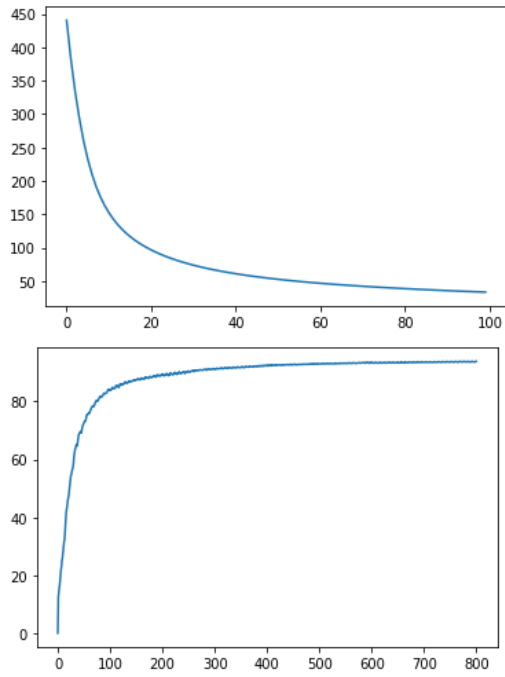
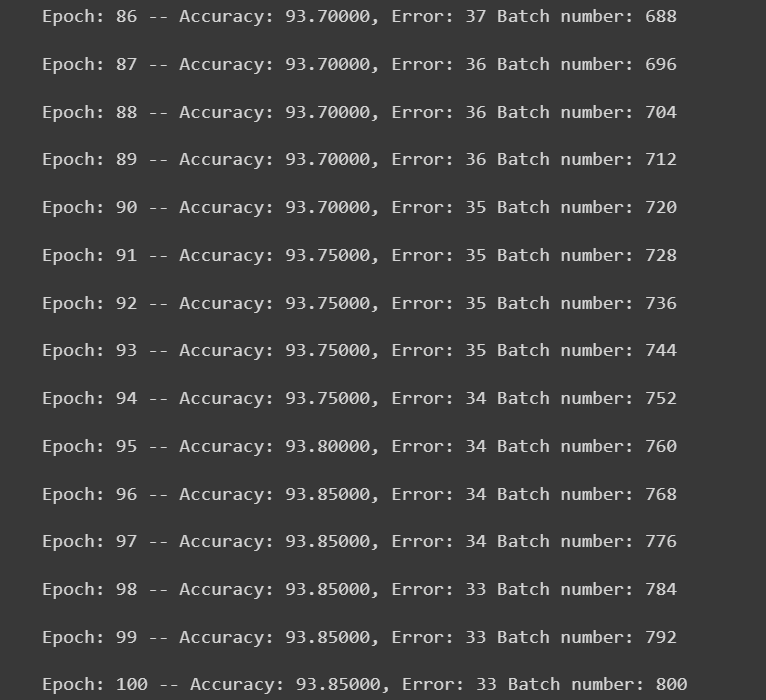